**Fahad ALnuaimi**
**Fahad.alnuaimi1@gmail.com**
**Project: Wrangle and Analyze the Data**

# Assessing Data
**This Notebook related to 1_wrangle_act_gather** 

In [1]:
# import libraries
import json
import tweepy
import pandas as pd
import numpy as np
import requests
import os
import matplotlib as plot
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# gather the three dataframes we created in 1_wrangle_act_gather 
twitter_archived = pd.read_csv('twitter-archive-enhanced.csv')
image_predictionsdf = pd.read_csv('image-predictions.tsv/image-predictions.tsv', sep='\t')
tweet_json = pd.read_csv('tweet_json.csv')

**Assessing** `twitter_archived`

In [3]:
twitter_archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archived.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [5]:
# show samples 
twitter_archived.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
170,859074603037188101,NaN,NaN,2017-05-01 15:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an exotic dog. Good at ukulele. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859074603...,13,10,None,None,None,None,None
809,771500966810099713,NaN,NaN,2016-09-02 00:12:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He's just saying hi. That's al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771500966...,12,10,Dakota,None,None,None,None
2221,668480044826800133,NaN,NaN,2015-11-22 17:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to DayZ. She is definitely stuck on ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668480044...,11,10,DayZ,None,None,None,None
1681,681981167097122816,NaN,NaN,2015-12-29 23:32:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He's a Trinidad Poliwhirl. Fa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681981167...,12,10,Jimothy,None,None,None,None
299,836989968035819520,NaN,NaN,2017-03-01 17:22:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mookie. He really enjoys shopping but ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836989968...,12,10,Mookie,None,None,None,None
2248,667866724293877760,NaN,NaN,2015-11-21 00:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shaggy. He knows exactly how to solve ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
606,798340744599797760,NaN,NaN,2016-11-15 01:44:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Davey. He'll have your ...,7.717705e+17,4.196984e+09,2016-09-02 18:03:10 +0000,https://twitter.com/dog_rates/status/771770456...,11,10,Davey,None,None,None,None
279,839990271299457024,NaN,NaN,2017-03-10 00:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sojourner. His nose is a Fibonacci Spiral...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839990271...,13,10,Sojourner,None,None,None,None
942,752917284578922496,NaN,NaN,2016-07-12 17:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Grizzie. She's a semi-submerged Bahrai...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752917284...,11,10,Grizzie,None,None,None,None


In [6]:
twitter_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
# drop null columns 
twitter_archived.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [8]:
# source need to be fixed
twitter_archived.source.iloc[1022]

'<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'

In [9]:
twitter_archived.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
twitter_archived.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [11]:
twitter_archived.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [12]:
twitter_archived.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [13]:
twitter_archived.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [14]:
twitter_archived[twitter_archived.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\Fahad\anaconda3\envs\plusaltra\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [15]:
twitter_archived.text.iloc[45]

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [16]:
twitter_archived.text.iloc[340]

"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"

In [17]:
twitter_archived.text.iloc[695]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [18]:
twitter_archived.text.iloc[763]

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [19]:
twitter_archived.text.iloc[1689]

"I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace"

In [20]:
twitter_archived.text.iloc[1712]

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

**Note: I will take the nearest this rating and update it manually**

**Assessing** `image_predictionsdf`

In [21]:
image_predictionsdf.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
image_predictionsdf.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [23]:
image_predictionsdf.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
153,668655139528511488,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,1,beagle,0.319110,True,Italian_greyhound,0.103338,True,basenji,0.091930,True
1447,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,web_site,0.999916,False,pug,0.000077,True,menu,0.000002,False
265,670803562457407488,https://pbs.twimg.com/media/CU8sSAvXIAAB1Py.jpg,1,basenji,0.344101,True,Ibizan_hound,0.210282,True,toy_terrier,0.196279,True
390,673363615379013632,https://pbs.twimg.com/media/CVhEoq4WcAE8pBm.jpg,1,ox,0.193431,False,warthog,0.123827,False,bison,0.111177,False
1459,778027034220126208,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1996,874680097055178752,https://pbs.twimg.com/media/DCN85nGUwAAzG_q.jpg,1,Labrador_retriever,0.836052,True,Staffordshire_bullterrier,0.047069,True,beagle,0.036007,True
1071,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1384,765719909049503744,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1,golden_retriever,0.969518,True,Labrador_retriever,0.021696,True,Border_terrier,0.002075,True
245,670468609693655041,https://pbs.twimg.com/media/CU37pEoWUAAitje.jpg,1,minivan,0.730152,False,beach_wagon,0.078661,False,car_wheel,0.064346,False
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True


**NOTE:** most likely the model p1 is the most accurate 

In [24]:
image_predictionsdf.jpg_url.iloc[5:]

5       https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg
6       https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
7       https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg
8       https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
9       https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg
                             ...                       
2070    https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
2071    https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
2072    https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
2073    https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2074    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
Name: jpg_url, Length: 2070, dtype: object

In [25]:
image_predictionsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_predictionsdf.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
image_predictionsdf.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
# mean of confidince columns
image_predictionsdf.p1_conf.mean() , image_predictionsdf.p2_conf.mean() , image_predictionsdf.p3_conf.mean()   

(0.5945482636144578, 0.1345886095003918, 0.060324168618106515)

In [29]:
# check the prediction of confidince columns and dog = false
# I have notice that most of them are not correct 
# once you open it you can see it's dog picture with some disturbing elemnts 
image_predictionsdf.query('p1_conf >= 0.9999 and p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False
230,670408998013820928,https://pbs.twimg.com/media/CU3FbQgVAAACdCQ.jpg,1,ping-pong_ball,0.999945,False,tennis_ball,1.763430e-05,False,racket,1.470730e-05,False
242,670449342516494336,https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg,1,peacock,0.999924,False,European_gallinule,2.987300e-05,False,agama,2.150760e-05,False
1229,745433870967832576,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,barrow,0.999962,False,basset,1.448950e-05,True,wok,6.060880e-06,False
1299,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False,Labrador_retriever,1.002880e-05,True,Eskimo_dog,1.434470e-06,True
1447,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,web_site,0.999916,False,pug,7.657020e-05,True,menu,2.164680e-06,False


**Assessing** `tweet_json`

In [30]:
tweet_json

,id,retweet_count,favorite_count
0,892420643555336193,7614,35899
1,892177421306343426,5638,30969
2,891815181378084864,3730,23306
3,891689557279858688,7787,39184
4,891327558926688256,8384,37439
...,...,...,...
2326,666049248165822465,40,96
2327,666044226329800704,130,269
2328,666033412701032449,41,111
2329,666029285002620928,42,120


In [31]:
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,7614,35899
1,892177421306343426,5638,30969
2,891815181378084864,3730,23306
3,891689557279858688,7787,39184
4,891327558926688256,8384,37439


In [32]:
tweet_json.tail()

,id,retweet_count,favorite_count
2326,666049248165822465,40,96
2327,666044226329800704,130,269
2328,666033412701032449,41,111
2329,666029285002620928,42,120
2330,666020888022790149,459,2391


In [33]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [34]:
tweet_json.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [35]:
tweet_json.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2674.888031,7498.640069
std,6.823170e+16,4523.464992,11639.597118
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,542.000000,1305.000000
50%,7.182469e+17,1253.000000,3260.000000
75%,7.986692e+17,3110.000000,9184.000000
max,8.924206e+17,76880.000000,154746.000000


### Assessing Data

#### Quality: issues with content. Low quality data is also known as dirty data.

`twitter_archived`
- Timestamp has wrong datatype object
- columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id andretweeted_status_timestamp have many NAN values
- mean raiting in rating_denominator and rating_numerator is 10 which is the highest number, I will fix the rating by taking the reatio of those coulmns then i'll create new category based on these columns
- source column url need to be fixed because it contain HTMLcode format
- there's some decimal raiting in rating_numerator, you can find it from text column but in rating_numerator is not visible because the datatype is integer it tooks the two digits after the comma. 

`image_predictionsdf`
- p1 breed name is mixed between lower case and upper case 
- p2_conf and p3_conf have lower mean than p1_conf
- prediction model with high confidence is not dog, but it's wrong index (106, 230, 1229, 1299)


`tweet_json`
- column name is id which need to be tweet_id

#### Tidiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:

- create master table contain all data


`twitter_archived`
- doggo, floofer, pupper and puppo can be in one column

# Cleaning Data


**Create copy version from original dataframe**

In [36]:
twitter_archived_clean = twitter_archived.copy()
image_predictionsdf_clean = image_predictionsdf.copy()
tweet_json_clean = tweet_json.copy()

**Clean `twitter_archived_clean`**

**Define:**

**Quality 1: Timestamp has wrong datatype object, we need to change the datatype to date time**

**Code:**

In [37]:
twitter_archived_clean['timestamp'] = twitter_archived_clean['timestamp'].astype('datetime64[ns]')

**Test:**

In [38]:
twitter_archived_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [39]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

**Define:** 

**Quality 2: Drop unwanted columns that have many null values**
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp

**Code:**

In [40]:
twitter_archived_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace= True)

**Test:**

In [41]:
twitter_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   object        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2356 non-null   int64         
 6   rating_denominator  2356 non-null   int64         
 7   name                2356 non-null   object        
 8   doggo               2356 non-null   object        
 9   floofer             2356 non-null   object        
 10  pupper              2356 non-null   object        
 11  puppo               2356 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


In [42]:
twitter_archived_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


**Define:**

**Quality 3: rating_numerator has some decimal values in raiting, I will update these values with nearest number to it**

**Code:** 

In [43]:
twitter_archived_clean[twitter_archived_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\Fahad\anaconda3\envs\plusaltra\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [44]:
twitter_archived_clean.iloc[45, twitter_archived_clean.columns.get_loc('rating_numerator')] = 14
twitter_archived_clean.iloc[340, twitter_archived_clean.columns.get_loc('rating_numerator')] = 10
twitter_archived_clean.iloc[695, twitter_archived_clean.columns.get_loc('rating_numerator')] = 10
twitter_archived_clean.iloc[763, twitter_archived_clean.columns.get_loc('rating_numerator')] = 12
twitter_archived_clean.iloc[1689, twitter_archived_clean.columns.get_loc('rating_numerator')] = 10
twitter_archived_clean.iloc[1712, twitter_archived_clean.columns.get_loc('rating_numerator')] = 12

**Test:** 

In [45]:
twitter_archived_clean.iloc[340]

tweet_id                                             832215909146226688
timestamp                                           2017-02-16 13:11:49
source                <a href="http://twitter.com/download/iphone" r...
text                  RT @dog_rates: This is Logan, the Chow who liv...
expanded_urls         https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                     10
rating_denominator                                                   10
name                                                              Logan
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 340, dtype: object

In [46]:
twitter_archived_clean.query('rating_numerator == 1776')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


**Define:**

**Quality 4: mean raiting in rating_denominator is 10 which is the highest number, but because it's "they are good dogs" I decided to create new category based on ratio of those two columns.**

**Code:** 

In [47]:
# create new column based on the ratio of those columns 
twitter_archived_clean['users_rating'] =  twitter_archived_clean['rating_denominator'] / twitter_archived_clean['rating_numerator']

In [48]:
# remove inf to be able to change data type of the column 
deletetheinf = twitter_archived_clean.query('users_rating == "inf"').index
twitter_archived_clean.drop(deletetheinf , inplace=True)

In [49]:
# cahnge data type to int
twitter_archived_clean['users_rating'] = twitter_archived_clean['users_rating'].astype('int')

In [50]:
# create the labels raiting categories 
pd.cut(twitter_archived_clean.users_rating,bins=[-1, 0, 1, 3, 5, 7, 11],labels=['poor','good','nice','excellent','gorgeous','exotic'])

0       poor
1       poor
2       poor
3       poor
4       poor
        ... 
2351    nice
2352    good
2353    good
2354    good
2355    good
Name: users_rating, Length: 2354, dtype: category
Categories (6, object): [poor < good < nice < excellent < gorgeous < exotic]

In [51]:
# Save the new valuse in variable category and insert into column rating_category. 
category = pd.cut(twitter_archived_clean.users_rating,bins=[-1, 0, 1, 3, 5, 7, 11],labels=['poor','good','nice','excellent','gorgeous','exotic'])
twitter_archived_clean.insert(6,'rating_category',category)

In [52]:
twitter_archived_clean.rating_category.value_counts()

poor         1450
good          815
nice           70
excellent      11
exotic          8
gorgeous        0
Name: rating_category, dtype: int64

**Test:** 

In [53]:
# now we have clean raitng 
twitter_archived_clean.users_rating.value_counts()

0     1450
1      815
2       51
3       19
5       11
10       8
Name: users_rating, dtype: int64

In [54]:
# new category based on the new raiting (users_rating)
twitter_archived_clean.rating_category.value_counts()

poor         1450
good          815
nice           70
excellent      11
exotic          8
gorgeous        0
Name: rating_category, dtype: int64

**Define:** 

**Quality 5: source column url need to be fixed because it contain HTML code format, remove the code and keep the text**

In [55]:
twitter_archived_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**Code:** 

In [56]:
twitter_archived_clean['source'] = twitter_archived_clean['source'].str.extract('^<a.+>(.+)</a>$')

**Test:** 

In [57]:
twitter_archived_clean.source.value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [58]:
twitter_archived_clean.expanded_urls.isnull().value_counts()

False    2295
True       59
Name: expanded_urls, dtype: int64

**Define:** 

**Tideness 1: doggo, floofer, pupper and puppo can combined in one column**

**Code:** 

In [59]:
twitter_archived_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_category', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'users_rating'],
      dtype='object')

In [60]:
# handle none
twitter_archived_clean.doggo.replace('None', '', inplace=True)
twitter_archived_clean.floofer.replace('None', '', inplace=True)
twitter_archived_clean.pupper.replace('None', '', inplace=True)
twitter_archived_clean.puppo.replace('None', '', inplace=True)

In [61]:
# merge into column
twitter_archived_clean['dog_stage'] = twitter_archived_clean.doggo + twitter_archived_clean.floofer + twitter_archived_clean.pupper + twitter_archived_clean.puppo

In [62]:
# handle multiple stages
twitter_archived_clean.loc[twitter_archived_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archived_clean.loc[twitter_archived_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archived_clean.loc[twitter_archived_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [63]:
# handle missing values
twitter_archived_clean.loc[twitter_archived_clean.dog_stage == '', 'dog_stage'] = np.nan

In [64]:
twitter_archived_clean.drop(columns=['doggo','floofer','pupper','pupper','puppo'], axis=1, inplace= True)

**Test:** 

In [65]:
list(twitter_archived_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_category',
 'rating_denominator',
 'name',
 'users_rating',
 'dog_stage']

`tweet_json`

**Define:** 

**Quality 6: column name is id which need to be tweet_id**

**Code:** 

In [66]:
tweet_json_clean.rename(columns = {'id':'tweet_id'}, inplace = True) 

**Test:** 

In [67]:
tweet_json_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7614,35899
1,892177421306343426,5638,30969
2,891815181378084864,3730,23306
3,891689557279858688,7787,39184
4,891327558926688256,8384,37439


`image_predictionsdf`

**Define:** 

**Quality 7: p1 breed name is mixed between lower case and upper case**

**Code:**

In [68]:
image_predictionsdf_clean["p1"] = image_predictionsdf_clean["p1"].str.lower()

**Test:** 

In [69]:
image_predictionsdf_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Define:** 

**Quality 8: p2_conf and p3_conf have lower mean than p1_conf, droping them will not effect the analysis**

**Code:** 

In [70]:
image_predictionsdf_clean.drop(columns=['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace= True)

**Test:** 

In [71]:
image_predictionsdf_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


**Define:** 

**Quality 9: prediction model with high confidence is not dog, but it's wrong. I will open the url one by one and use https://www.bing.com/visualsearch/Microsoft/WhatDog to predict dog breed then update the table manually**

**Code:**

In [72]:
image_predictionsdf_clean.query('p1_conf >= 0.9999 and p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False
230,670408998013820928,https://pbs.twimg.com/media/CU3FbQgVAAACdCQ.jpg,1,ping-pong_ball,0.999945,False
242,670449342516494336,https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg,1,peacock,0.999924,False
1229,745433870967832576,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,barrow,0.999962,False
1299,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False
1447,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,web_site,0.999916,False


In [73]:
image_predictionsdf_clean.query('p1_conf >= 0.9999 and p1_dog == False').jpg_url

106     https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg
230     https://pbs.twimg.com/media/CU3FbQgVAAACdCQ.jpg
242     https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg
1229    https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg
1299    https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg
1447    https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg
Name: jpg_url, dtype: object

In [74]:
image_predictionsdf_clean.iloc[106, image_predictionsdf_clean.columns.get_loc('p1')] = "portuguese_water_dog"
image_predictionsdf_clean.iloc[106, image_predictionsdf_clean.columns.get_loc('p1_dog')] = True
image_predictionsdf_clean.iloc[230, image_predictionsdf_clean.columns.get_loc('p1')] = "pharaoh_hound"
image_predictionsdf_clean.iloc[230, image_predictionsdf_clean.columns.get_loc('p1_dog')] = True
image_predictionsdf_clean.iloc[1229, image_predictionsdf_clean.columns.get_loc('p1')] = "golden_retriever"
image_predictionsdf_clean.iloc[1229, image_predictionsdf_clean.columns.get_loc('p1_dog')] = True
image_predictionsdf_clean.iloc[1299, image_predictionsdf_clean.columns.get_loc('p1')] = "kuvasz"
image_predictionsdf_clean.iloc[1299, image_predictionsdf_clean.columns.get_loc('p1_dog')] = True

**Test:**

In [75]:
image_predictionsdf_clean.query('p1_conf >= 0.9999 and p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
242,670449342516494336,https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg,1,peacock,0.999924,False
1447,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,web_site,0.999916,False


In [76]:
image_predictionsdf_clean.iloc[106]

tweet_id                                 667866724293877760
jpg_url     https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg
img_num                                                   1
p1                                     portuguese_water_dog
p1_conf                                                   1
p1_dog                                                 True
Name: 106, dtype: object

In [77]:
image_predictionsdf_clean.iloc[230]

tweet_id                                 670408998013820928
jpg_url     https://pbs.twimg.com/media/CU3FbQgVAAACdCQ.jpg
img_num                                                   1
p1                                            pharaoh_hound
p1_conf                                            0.999945
p1_dog                                                 True
Name: 230, dtype: object

In [78]:
image_predictionsdf_clean.iloc[1229]

tweet_id                                 745433870967832576
jpg_url     https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg
img_num                                                   1
p1                                         golden_retriever
p1_conf                                            0.999962
p1_dog                                                 True
Name: 1229, dtype: object

In [79]:
image_predictionsdf_clean.iloc[1299]

tweet_id                                 752519690950500352
jpg_url     https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg
img_num                                                   3
p1                                                   kuvasz
p1_conf                                            0.999984
p1_dog                                                 True
Name: 1299, dtype: object

**Define:** 

**Tideness 2: Merge all dataframes in one dataframe and called master** 

**Code:** 

In [80]:
twitter_archived_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_category,rating_denominator,name,users_rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,poor,10,Phineas,0,NaN


In [81]:
image_predictionsdf_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True


In [82]:
tweet_json_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7614,35899


In [83]:
# merg all dataframes in one 
twitter_master = pd.merge(twitter_archived_clean, image_predictionsdf_clean, on='tweet_id', how= 'inner' )

In [84]:
twitter_master = pd.merge(twitter_master, tweet_json_clean, on='tweet_id', how= 'inner' )

**Test:** 

In [86]:
twitter_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_category,rating_denominator,name,users_rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,poor,10,Phineas,0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,7614,35899
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,poor,10,Tilly,0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,5638,30969
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,poor,10,Archie,0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,3730,23306
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,poor,10,Darla,0,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,7787,39184
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,poor,10,Franklin,0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,8384,37439


# Analyze the data 

In [87]:
# Export the new df to new csv file
twitter_master.to_csv('twitter_master_df.csv', index=False)

In [88]:
# create new dataframe from the new csv file we exported 
df = pd.read_csv('twitter_master_df.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_category,rating_denominator,name,users_rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,poor,10,Phineas,0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,7614,35899
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,poor,10,Tilly,0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,5638,30969
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,poor,10,Archie,0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,3730,23306
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,poor,10,Darla,0,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,7787,39184
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,poor,10,Franklin,0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,8384,37439


## Insights and Visualization

### Insight 1: what is top 5 favoriteed and retweeted and which breed earned it?

In [97]:
# count highest fav and retweet and show category 
df.groupby(['retweet_count','favorite_count']) ['p1'].value_counts().tail(5)

retweet_count  favorite_count  p1                
40218          98530           english_springer      1
43356          131999          lakeland_terrier      1
56071          119561          chihuahua             1
57127          114441          eskimo_dog            1
76880          154746          labrador_retriever    1
Name: p1, dtype: int64

**Highest fav and retweet** 
- 1 labrador_retriever
- 2 eskimo_dog 
- 3 chihuahua
- 4 lakeland_terrier 
- 5 english_springer


### Insight 2: what is the most popular raiting category?


In [98]:
# vaalue counts of my new raiting category 
df.users_rating.value_counts()

0     1214
1      761
2       49
3       19
5       10
10       4
Name: users_rating, dtype: int64

In [99]:
df.rating_category.value_counts()

poor         1214
good          761
nice           68
excellent      10
exotic          4
Name: rating_category, dtype: int64

**usres raiting is the ratio between rating_denominator and rating_numerator, you can get more accurate prespective with this raiting which as you can see the highest number is 10. I have created label category reflect these ratings, the most popular raiting is poor.**

**Bs: the acual raiting is not zero but with deviding between these columns and getting value as integeer it become zero, alo you can observe how these raitings are low**

### Insight 3: what is the most popular source?

In [100]:
# value counts 
df.source.value_counts()

Twitter for iPhone    2017
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

**Most popular source is Twitter fo iphone**

## Visualization:

Text(0.5, 1.0, 'The Distribution of Dogs breed')

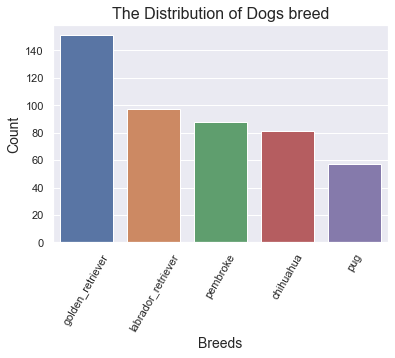

In [105]:
# Visulize top 5 breeds 
# 
Dog_breeds = df['p1'].value_counts().head(5).index
sns.set(style="darkgrid")
sns.countplot(data = df, x = 'p1', order = Dog_breeds, orient = 'h')
plt.xticks(rotation = 60)
plt.xlabel('Breeds', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of Dogs breed',fontsize=16)

**Top breed is goden retriver in predicton model**